1. Zbiór danych zawiera 10 odręczne napisanych liter, a zadaniem algorytmu jest prawidłowe rozpoznanie litery na podstawie wartości pikseli.


    0    1    2     3     4     5    6   ...   57   58    59    60    61   62   63
0  0.0  0.0  5.0  13.0   9.0   1.0  0.0  ...  0.0  6.0  13.0  10.0   0.0  0.0  0.0
1  0.0  0.0  0.0  12.0  13.0   5.0  0.0  ...  0.0  0.0  11.0  16.0  10.0  0.0  0.0
2  0.0  0.0  0.0   4.0  15.0  12.0  0.0  ...  0.0  0.0   3.0  11.0  16.0  9.0  0.0
3  0.0  0.0  7.0  15.0  13.0   1.0  0.0  ...  0.0  7.0  13.0  13.0   9.0  0.0  0.0
4  0.0  0.0  0.0   1.0  11.0   0.0  0.0  ...  0.0  0.0   2.0  16.0   4.0  0.0  0.0

[5 rows x 64 columns]
.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
ht

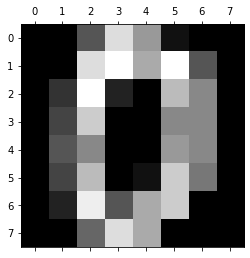


------------DT-------------

Accuracy (mean):  0.8330066782810686
Accuracy (train):  1.0
Accuracy (test):  0.8166666666666667
Confusion matrix:
    0   1   2   3   4   5   6   7   8   9
0  32   0   0   0   0   1   0   0   1   0
1   0  33   1   1   1   0   0   3   3   2
2   0   3  33   2   0   0   1   0   1   1
3   0   1   0  29   0   0   0   1   3   3
4   1   1   0   2  27   1   2   0   0   0
5   0   0   0   0   0  33   1   0   0   1
6   0   0   1   1   0   0  33   0   0   0
7   0   1   0   0   1   0   0  26   0   1
8   0   0   2   5   0   1   0   0  30   2
9   0   2   0   3   3   2   0   0   3  18


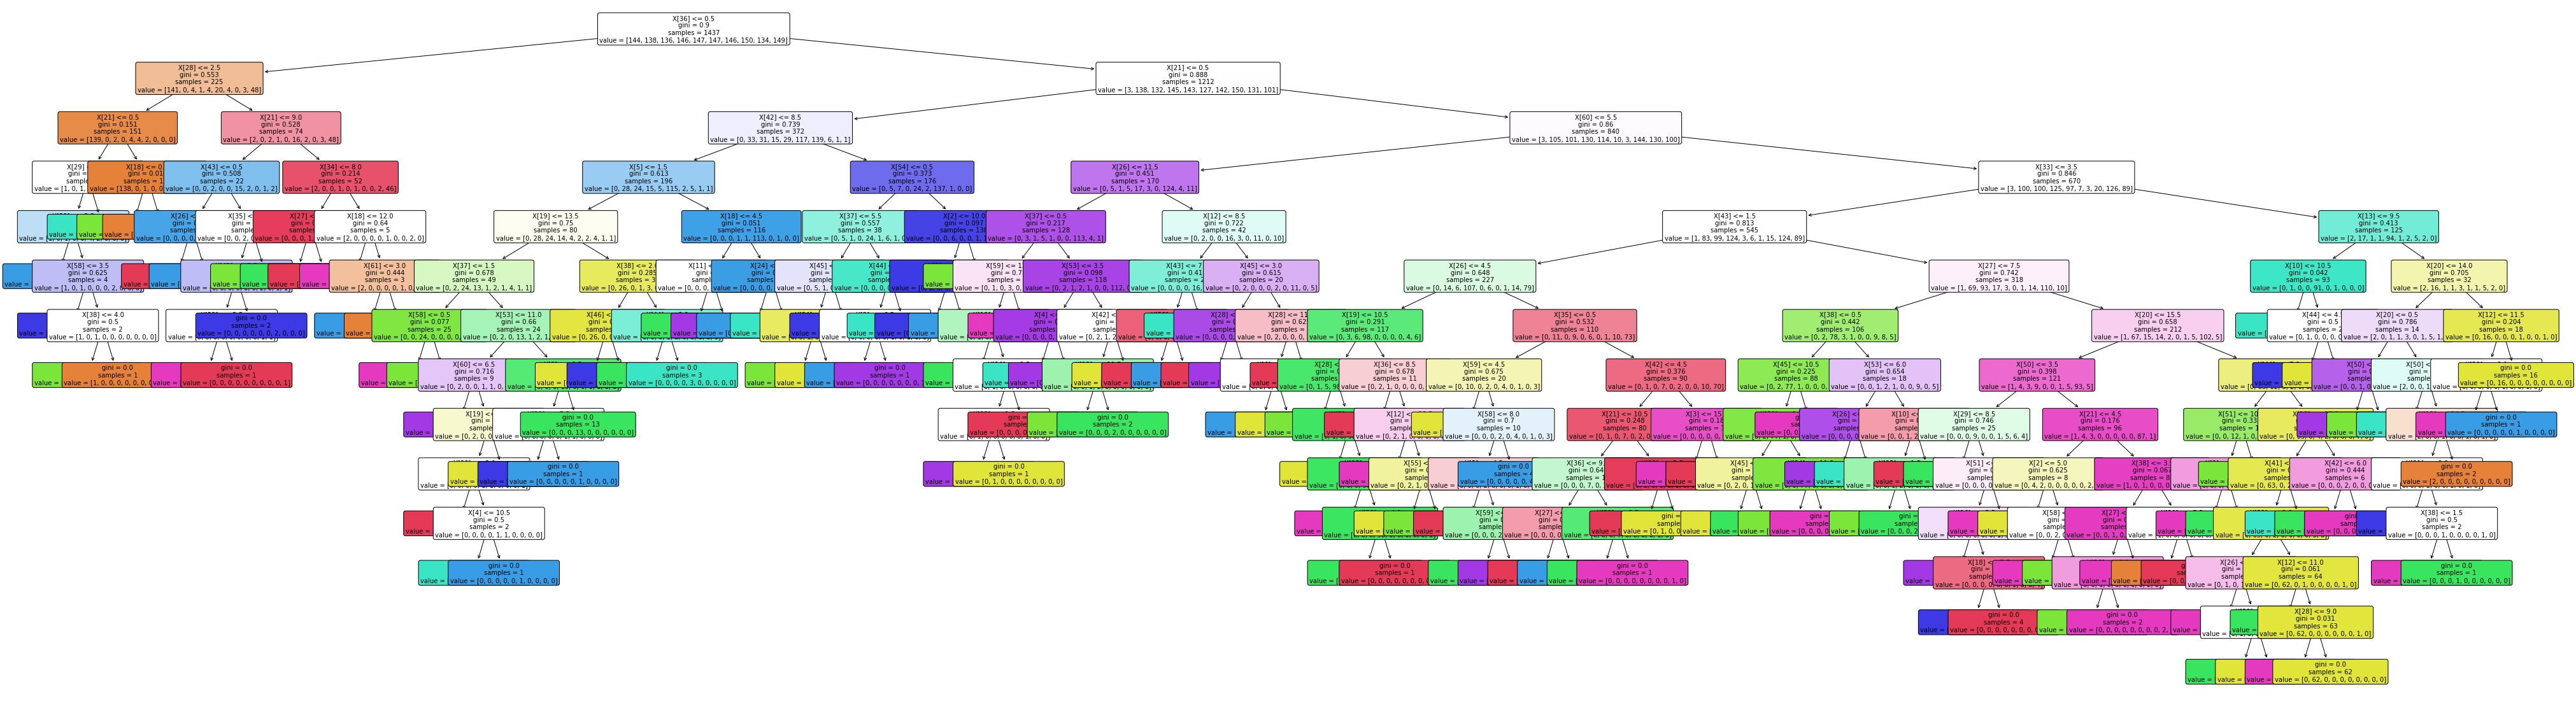

-----------Przycinanie drzewa-------------
Accuracy (mean):  0.8475948509485095
Accuracy (train):  1.0
Accuracy (test):  0.9
Confusion matrix:
    0   1   2   3   4   5   6   7   8   9
0  32   0   0   0   0   0   0   0   0   0
1   0  31   0   0   0   0   0   0   2   0
2   0   1  34   1   0   0   0   0   0   1
3   0   0   0  34   0   1   0   2   4   1
4   2   1   0   0  37   0   0   1   0   0
5   0   0   0   1   0  32   1   0   0   0
6   0   1   0   0   0   0  38   0   0   0
7   0   1   2   0   0   0   0  27   1   4
8   0   3   0   2   1   0   0   0  28   0
9   0   0   0   1   1   0   0   0   0  31


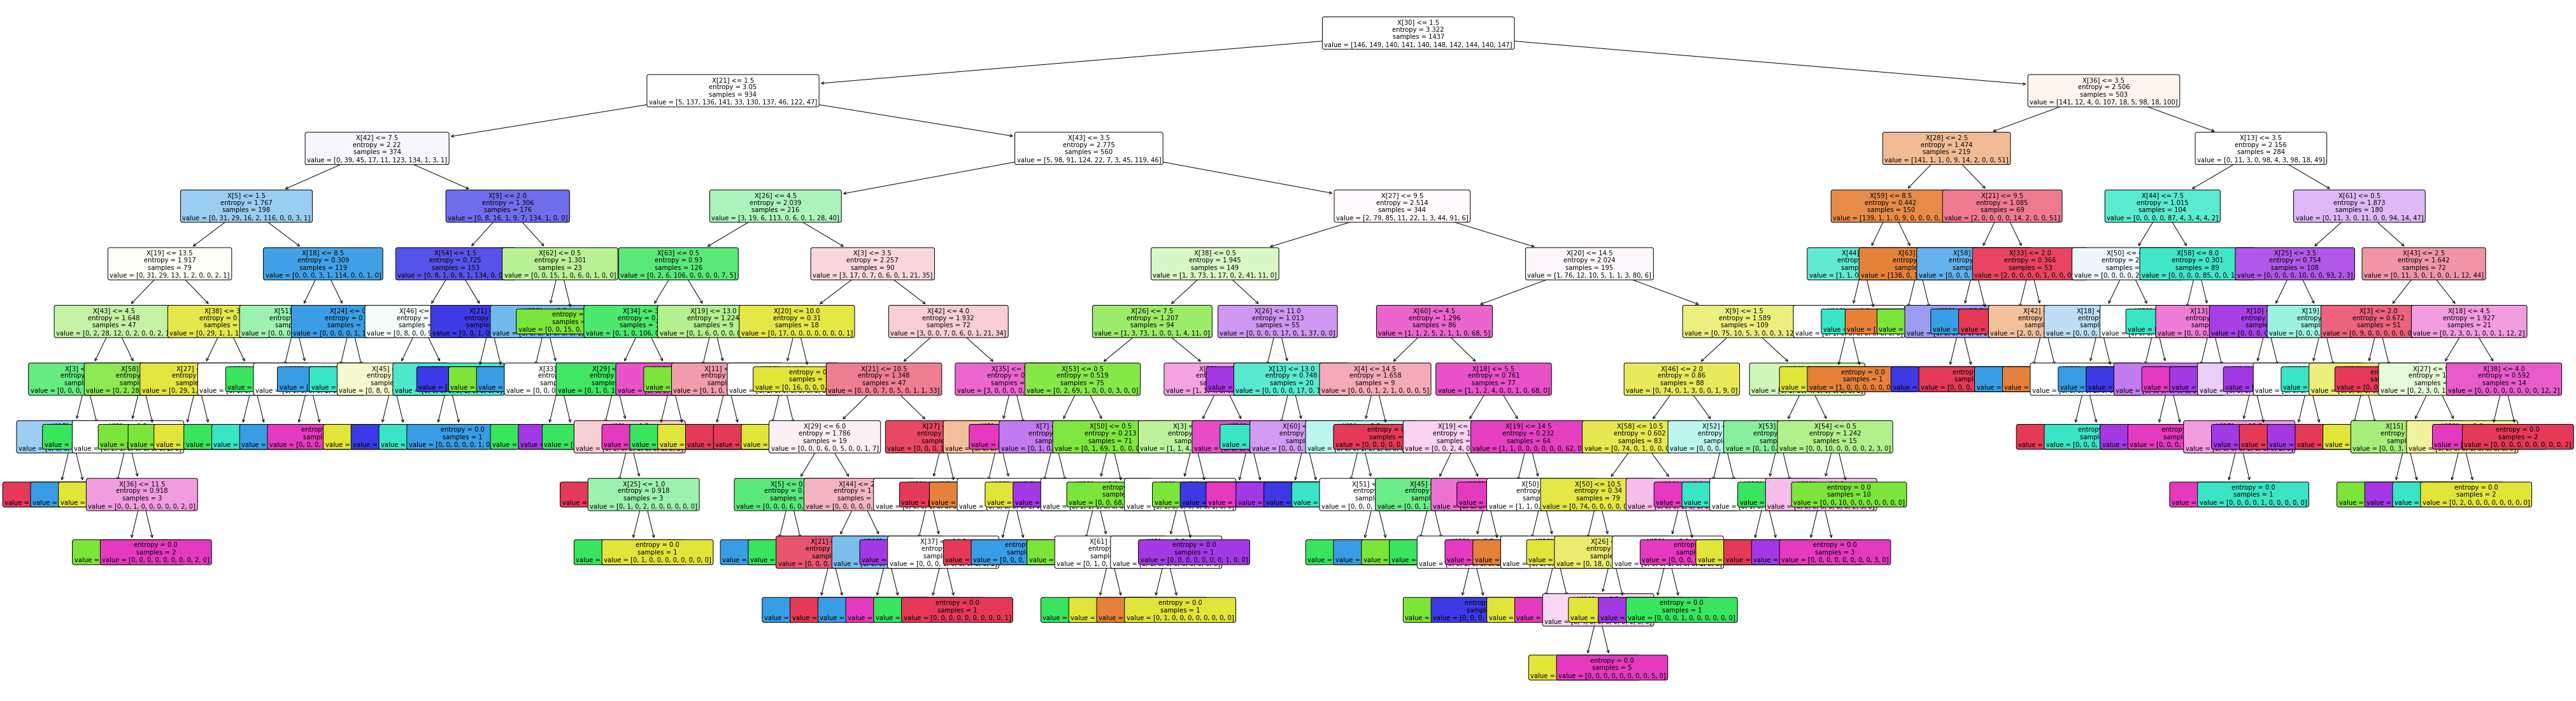


--------------RF--------------

Accuracy (train): 1.0
Accuracy (test): 0.9629629629629629


In [ ]:
%matplotlib inline
from sklearn.datasets import load_iris 
from sklearn.ensemble import RandomForestClassifier 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn import tree
from pandas_profiling import describe 
from sklearn import metrics 
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.datasets import load_digits

digits=load_digits()
df=pd.DataFrame(digits.data)
print(df.head())
print(digits.DESCR)
print(digits.target_names)
print('\nExample image:')
plt.matshow(digits.images[0], cmap='gray')
plt.show()

X=digits.data
y=digits.target

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
clf=tree.DecisionTreeClassifier()
scores=cross_val_score(clf,X_train,y_train,cv=5)
print('\n------------DT-------------\n')
print('Accuracy (mean): ', scores.mean())
clf=clf.fit(X_train,y_train)
y_test_pred=clf.predict(X_test)
y_pred=clf.predict(X_train)
print('Accuracy (train): ', accuracy_score(y_train,y_pred))
print('Accuracy (test): ', accuracy_score(y_test,y_test_pred))
print('Confusion matrix:')
cm=confusion_matrix(y_test,y_test_pred)
print(pd.DataFrame(cm))

plt.figure(figsize=(70,20))
tree.plot_tree(clf,fontsize=10,filled=True,rounded=True)
plt.show()


import graphviz
dot_data=tree.export_graphviz(clf,out_file=None, filled=True, rounded=True,special_characters=True)
graph=graphviz.Source(dot_data,format='png')
graph.render('DigitsDT')
graph


print('-----------Przycinanie drzewa-------------')
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
clf=tree.DecisionTreeClassifier(criterion="entropy",max_depth=12)
scores=cross_val_score(clf,X_train,y_train,cv=5)
print('Accuracy (mean): ', scores.mean())
clf=clf.fit(X_train,y_train)
y_test_pred=clf.predict(X_test)
y_pred=clf.predict(X_train)
print('Accuracy (train): ', accuracy_score(y_train,y_pred))
print('Accuracy (test): ', accuracy_score(y_test,y_test_pred))
print('Confusion matrix:')
cm=confusion_matrix(y_test,y_test_pred)
print(pd.DataFrame(cm))

plt.figure(figsize=(70,20))
tree.plot_tree(clf,fontsize=10,filled=True,rounded=True)
plt.show()


import graphviz
dot_data=tree.export_graphviz(clf,out_file=None, filled=True, rounded=True,special_characters=True)
graph=graphviz.Source(dot_data,format='png')
graph.render('DigitsDT_12')
graph



X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)
clf=RandomForestClassifier(n_estimators=30)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
y_train_pred=clf.predict(X_train)
print('\n--------------RF--------------')
print('\nAccuracy (train):', accuracy_score(y_train,y_train_pred))
print('Accuracy (test):', accuracy_score(y_test,y_pred))


3. Wykonano walidację krzyżową dla drzewa decyzyjnego i uzyskano średnią dokładności 0.83. Próbowano ją podnieść przez przycinanie drzewa jednak udało się to zrobić jedynie do poziomu dokładności 0.84, jednak zwykła walidacja z podziałem na zbiór testowy i treningowy ma lepszą dokładność dla zbioru testowego: 0.9. Nie jest to jednak zadowalająca dokładność pozwalająca na praktyczne wykorzystanie algorytmu. Natomiast dla lasów losowych zastosowano walidację z podziałem na zbiór treningowy i testowy i uzyskano zadowalającą dokładność 0.97 dla zbioru testowego.

5. Zdecydowanie lepiej sprawdza się metoda lasów losowych, która mogłaby zostać wykorzystana w praktyce do przedstawionego problemu. Aby algorytm drzewa decyzyjnego mógł zostać wykorzystany, o ile to możliwe, należy popracować nad jego dokładnością.


**Stanisław Kaczmarski**